In [64]:
import librosa
import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt
import numpy as np

In [65]:
audio_file =  "training_set/Godfather-sample0.wav"

In [66]:
ipd.Audio(audio_file)

In [67]:
signal, sr = librosa.load(audio_file)

In [68]:
signal.shape

(220416,)

In [69]:
#extract MFCCs
mfccs = librosa.feature.mfcc(signal, n_mfcc=13, sr = sr)

<ipython-input-69-dc4746345ff7>:2: FutureWarning: Pass y=[-0.01188168 -0.01957528 -0.01626313 ... -0.00696799 -0.00790748
 -0.00815464] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, n_mfcc=13, sr = sr)


In [70]:
mfccs.shape

(13, 431)

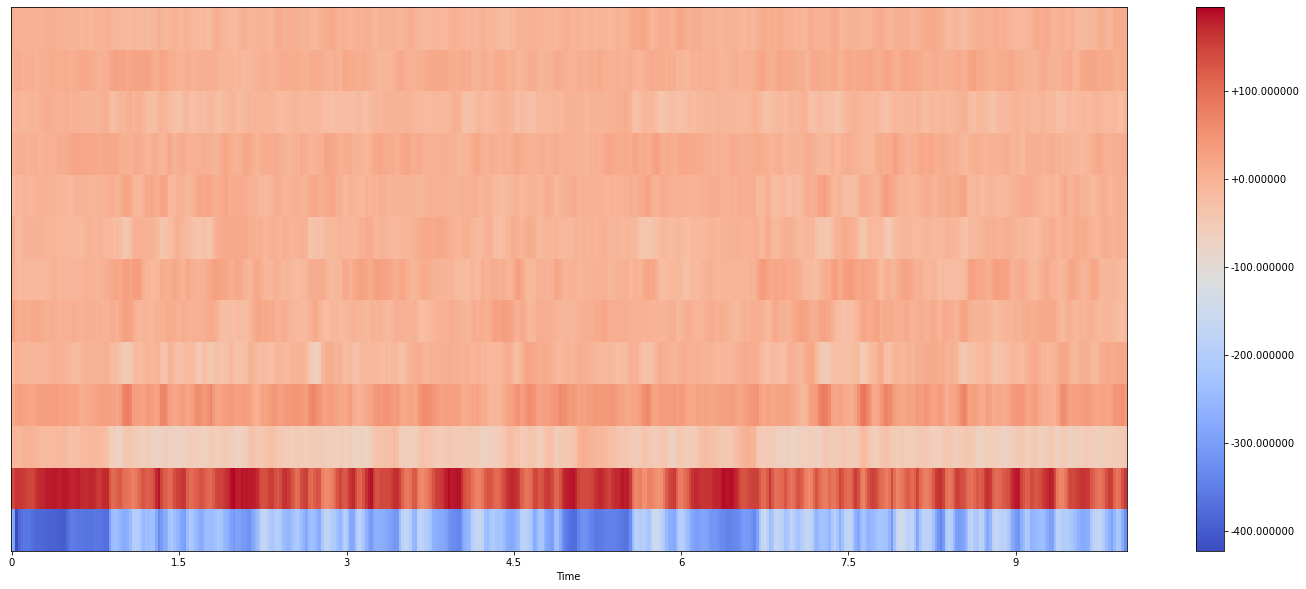

In [71]:
#visualize MFCCs
plt.figure(figsize = (25, 10))
librosa.display.specshow(mfccs, x_axis = "time", sr = sr)
plt.colorbar(format = "%+2f")
plt.show()

In [72]:
#calculate delta and delta2 MFCCs (derivative)
delta_mfccs = librosa.feature.delta(mfccs)
delta2_mfccs = librosa.feature.delta(mfccs, order=2)

In [73]:
delta_mfccs.shape

(13, 431)

In [74]:
delta2_mfccs.shape

(13, 431)

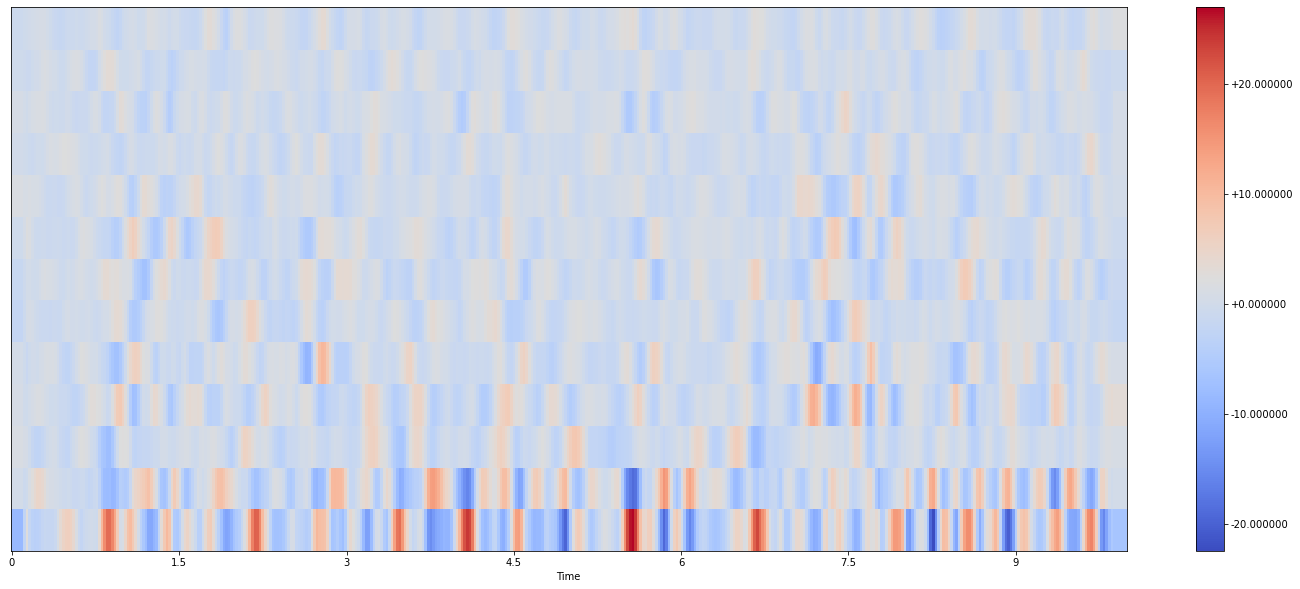

In [75]:
plt.figure(figsize=(25,10))
librosa.display.specshow(delta_mfccs, x_axis = "time", sr = sr)
plt.colorbar(format = "%+2f")
plt.show()

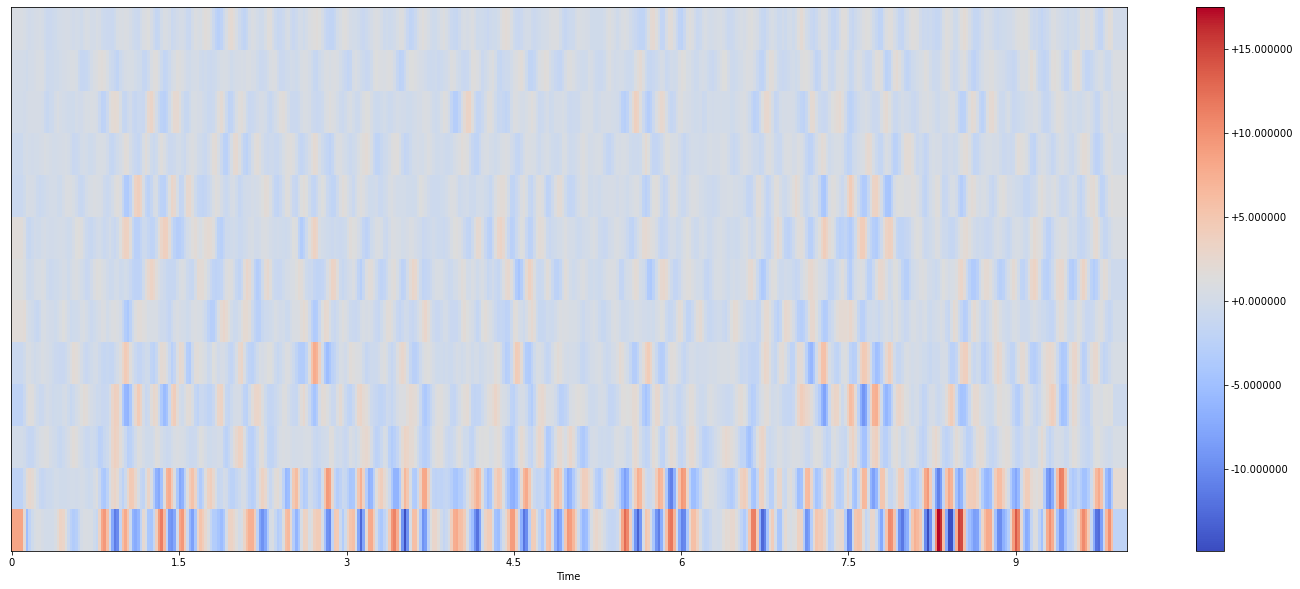

In [76]:
plt.figure(figsize=(25,10))
librosa.display.specshow(delta2_mfccs, x_axis = "time", sr = sr)
plt.colorbar(format = "%+2f")
plt.show()

In [77]:
#unique MFCC signatures to each audio files
comprehensive_mfccs = np.concatenate((mfccs, delta_mfccs, delta2_mfccs))